In [135]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [136]:
data = {
    'binary_feature': [1, 0, np.nan, 1, 0],
    'numeric_feature1': [10, 3, 6, 1, 7],
    'numeric_feature2': [np.nan, 3, 2, np.nan, 4],
    'categorical_feature': ['manzana', 'pera', 'naranja', np.nan, 'piña'],
    'target': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
print("Dataset original con valores nulos:")
print(df)

Dataset original con valores nulos:
   binary_feature  numeric_feature1  numeric_feature2 categorical_feature  \
0             1.0                10               NaN             manzana   
1             0.0                 3               3.0                pera   
2             NaN                 6               2.0             naranja   
3             1.0                 1               NaN                 NaN   
4             0.0                 7               4.0                piña   

   target  
0       1  
1       0  
2       1  
3       0  
4       1  


In [137]:
# Imputar valores nulos en características binarias usando KNN
knn_imputer = KNNImputer(n_neighbors=2)
df[['binary_feature']] = knn_imputer.fit_transform(df[['binary_feature']])
print("Después de imputar la columna binaria con KNN:")
print(df)

Después de imputar la columna binaria con KNN:
   binary_feature  numeric_feature1  numeric_feature2 categorical_feature  \
0             1.0                10               NaN             manzana   
1             0.0                 3               3.0                pera   
2             0.5                 6               2.0             naranja   
3             1.0                 1               NaN                 NaN   
4             0.0                 7               4.0                piña   

   target  
0       1  
1       0  
2       1  
3       0  
4       1  


In [138]:
# Imputar valores nulos en características numéricas usando interpolación
df['numeric_feature2'] = df['numeric_feature2'].interpolate()
print("Después de imputar la columna numérica con interpolación:")
print(df)


Después de imputar la columna numérica con interpolación:
   binary_feature  numeric_feature1  numeric_feature2 categorical_feature  \
0             1.0                10               NaN             manzana   
1             0.0                 3               3.0                pera   
2             0.5                 6               2.0             naranja   
3             1.0                 1               3.0                 NaN   
4             0.0                 7               4.0                piña   

   target  
0       1  
1       0  
2       1  
3       0  
4       1  


In [139]:
# One-Hot Encoding para características categóricas
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = ohe.fit_transform(df[['categorical_feature']])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(['categorical_feature']))

# Combinar con el DataFrame original sin la columna categórica original
df_combined = pd.concat([df.drop(columns=['categorical_feature']), cat_encoded_df], axis=1)

# Imputar valores nulos en la característica categórica usando KNN
df_combined = pd.DataFrame(knn_imputer.fit_transform(df_combined), columns=df_combined.columns)
print("Después de imputar la columna categórica con KNN:")
print(df_combined)

# Mantener las características categóricas en formato codificado para el modelo
df_final = df_combined  # No revertimos el One-Hot Encoding para el modelo

Después de imputar la columna categórica con KNN:
   binary_feature  numeric_feature1  numeric_feature2  target  \
0             1.0              10.0               3.0     1.0   
1             0.0               3.0               3.0     0.0   
2             0.5               6.0               2.0     1.0   
3             1.0               1.0               3.0     0.0   
4             0.0               7.0               4.0     1.0   

   categorical_feature_manzana  categorical_feature_naranja  \
0                          1.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   categorical_feature_pera  categorical_feature_piña  categorical_feature_nan  
0                       0.0                       0.0                      0.0  
1                 

Accuracy: 0.5000


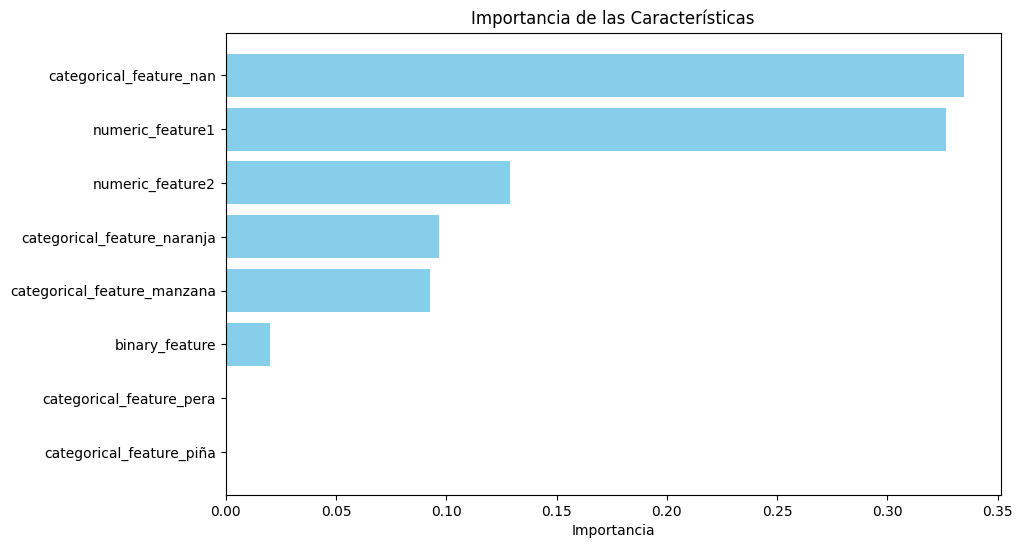

In [140]:
# Separar características y la variable objetivo
X = df_final.drop(columns=['target'])
y = df_final['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Obtener las importancias de las características
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()

**El siguiente paso en Machine Learning después de preprocesar los datos y evaluar modelos iniciales incluye optimizar esos modelos, comparar múltiples algoritmos, realizar evaluaciones adicionales y diagnósticos, implementar el mejor modelo en producción y monitorizar su rendimiento continuo. Cada uno de estos pasos ayuda a asegurar que el modelo no solo es preciso y robusto, sino también confiable y mantenible en un entorno real.**

In [141]:
# Revertir One-Hot Encoding a la forma original
encoded_cols = ohe.get_feature_names_out(['categorical_feature'])
decoded_categories = ohe.inverse_transform(df_combined[encoded_cols])
df_combined['categorical_feature'] = pd.Series(decoded_categories.flatten())
df_reverted = df_combined.drop(columns=encoded_cols)
print("Después de revertir el One-Hot Encoding:")
print(df_reverted)

Después de revertir el One-Hot Encoding:
   binary_feature  numeric_feature1  numeric_feature2  target  \
0             1.0              10.0               3.0     1.0   
1             0.0               3.0               3.0     0.0   
2             0.5               6.0               2.0     1.0   
3             1.0               1.0               3.0     0.0   
4             0.0               7.0               4.0     1.0   

  categorical_feature  
0             manzana  
1                pera  
2             naranja  
3                 NaN  
4                piña  


In [142]:
# Reemplazar valores categóricos por numéricos, aplicar interpolación y revertir
dicc_categorical = {'manzana': 1, 'pera': 2, 'naranja': 3, 'piña': 4}
df_reverted['categorical_feature_num'] = df_reverted['categorical_feature'].replace(dicc_categorical)
df_reverted['categorical_feature_num'] = df_reverted['categorical_feature_num'].interpolate().round()

# Revertir los valores numéricos a categóricos
reverse_dicc_categorical = {v: k for k, v in dicc_categorical.items()}
df_reverted['categorical_feature'] = df_reverted['categorical_feature_num'].replace(reverse_dicc_categorical)
df_reverted.drop(columns=['categorical_feature_num'], inplace=True)

print("Después de revertir el One-Hot Encoding y aplicar interpolación:")
print(df_reverted)

Después de revertir el One-Hot Encoding y aplicar interpolación:
   binary_feature  numeric_feature1  numeric_feature2  target  \
0             1.0              10.0               3.0     1.0   
1             0.0               3.0               3.0     0.0   
2             0.5               6.0               2.0     1.0   
3             1.0               1.0               3.0     0.0   
4             0.0               7.0               4.0     1.0   

  categorical_feature  
0             manzana  
1                pera  
2             naranja  
3                piña  
4                piña  


C:\Users\FRANK\AppData\Local\Temp\ipykernel_24200\1852737188.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reverted['categorical_feature_num'] = df_reverted['categorical_feature'].replace(dicc_categorical)
